In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
affvids_db = niidb.FMriActivationsDb('data/affvids2018.db')

In [5]:
dtfa = DTFA.DeepTFA(affvids_db.all(), mask='/home/eli/Documents/AffVids_20180104/nifti/wholebrain2.nii.gz', num_factors=100, embedding_dim=2)

09/27/2018 17:31:21 Loading Nifti image /home/eli/Documents/AffVids_20180104/nifti/sub-23_task-AffVids_run-02_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/AffVids_20180104/nifti/wholebrain2.nii.gz (zscore=True, smooth=6)
09/27/2018 17:31:37 Loading Nifti image /home/eli/Documents/AffVids_20180104/nifti/sub-23_task-AffVids_run-03_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/AffVids_20180104/nifti/wholebrain2.nii.gz (zscore=True, smooth=6)
09/27/2018 17:31:53 Loading Nifti image /home/eli/Documents/AffVids_20180104/nifti/sub-15_task-AffVids_run-01_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/AffVids_20180104/nifti/wholebrain2.nii.gz (zscore=True, smooth=6)
09/27/2018 17:32:09 Loading Nifti image /home/eli/Documents/AffVids_20180104/nifti/sub-15_task-AffVids_run-02_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/AffVids_20180104/nifti/wholebrain2.nii.gz (zscore=True, sm

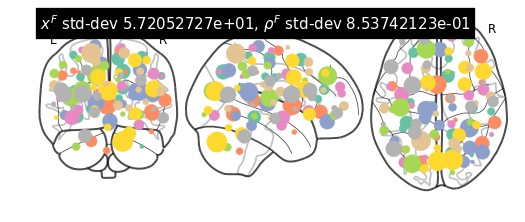

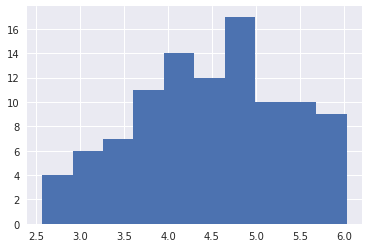

(<nilearn.plotting.displays.OrthoProjector at 0x7f7346baea90>,
 tensor([[-36.7449, -41.8572,  57.4997],
         [ 55.8391, -24.1412,  35.4020],
         [-33.2006, -35.6558,  -7.3120],
         [-25.9562,  37.8737,  21.6195],
         [ 15.3620, -68.3457,  40.1982],
         [ 11.1152,  31.6054,  11.7998],
         [ 35.3438, -69.7810, -38.9110],
         [ 35.5057, -19.6031,  55.3375],
         [-19.3626, -60.6707,   0.8869],
         [ 14.8584, -48.0657,  22.2045],
         [-36.0095, -39.9750,  22.1859],
         [-29.2296, -14.3090,  34.2397],
         [ 10.3154,  13.2770,  53.2161],
         [ -1.0534,   4.1488,   4.5578],
         [ 45.1741,  34.1157,  -1.9735],
         [-36.7633, -64.0111,  40.7831],
         [ 45.4555,   6.5153, -23.1118],
         [ 12.8080, -10.0662,  62.4952],
         [-31.0239,  23.0363,  39.4315],
         [ -1.7516, -51.0901, -43.2913],
         [ 59.5320, -35.6519,   9.8959],
         [-48.4071,   2.5776,  35.8027],
         [ 18.2114, -32.9614,  39.8

In [6]:
dtfa.visualize_factor_embedding()

In [7]:
def task_labeler(b):
    if 'heights' in b.task:
        return 'Heights'
    elif 'social' in b.task:
        return 'Social threat'
    elif 'spider' in b.task:
        return 'Spiders'
    elif 'rest' in b.task:
        return 'Rest'
    else:
        return None

def rest_task_labeler(b):
    if b.task == 'rest':
        return 'Rest'
    else:
        return 'Task'

In [8]:
losses = dtfa.train(num_steps=2000, learning_rate=1e-1, log_level=logging.INFO, num_particles=1,
                    batch_size=12, use_cuda=True, checkpoint_steps=50, blocks_batch_size=8, patience=100)

09/27/2018 17:49:33 [Epoch 1] (96518ms) Posterior free-energy 3.39889254e+09 = KL from prior 1.61915406e+06 - log-likelihood -3.39727475e+09
09/27/2018 17:49:33 Saving checkpoint...
09/27/2018 17:51:07 [Epoch 2] (93696ms) Posterior free-energy 3.31328205e+09 = KL from prior 2.12492906e+06 - log-likelihood -3.31115635e+09
09/27/2018 17:52:37 [Epoch 3] (90180ms) Posterior free-energy 3.30914304e+09 = KL from prior 2.54243112e+06 - log-likelihood -3.30660096e+09
09/27/2018 17:54:07 [Epoch 4] (90187ms) Posterior free-energy 3.30646093e+09 = KL from prior 2.82266275e+06 - log-likelihood -3.30363750e+09
09/27/2018 17:55:39 [Epoch 5] (91405ms) Posterior free-energy 3.30261709e+09 = KL from prior 3.21819038e+06 - log-likelihood -3.29939942e+09
09/27/2018 17:57:09 [Epoch 6] (89626ms) Posterior free-energy 3.29820621e+09 = KL from prior 3.75944962e+06 - log-likelihood -3.29444787e+09
09/27/2018 17:58:38 [Epoch 7] (89856ms) Posterior free-energy 3.29261210e+09 = KL from prior 4.42423312e+06 - log

Epoch   219: reducing learning rate of group 0 to 5.0000e-02.


09/27/2018 23:18:02 [Epoch 221] (89477ms) Posterior free-energy 2.97500416e+09 = KL from prior 8.11854000e+06 - log-likelihood -2.96688621e+09
09/27/2018 23:19:31 [Epoch 222] (89501ms) Posterior free-energy 2.94843443e+09 = KL from prior 8.08893250e+06 - log-likelihood -2.94034515e+09
09/27/2018 23:21:01 [Epoch 223] (89579ms) Posterior free-energy 2.94441626e+09 = KL from prior 8.06350925e+06 - log-likelihood -2.93635213e+09
09/27/2018 23:22:31 [Epoch 224] (89635ms) Posterior free-energy 2.93329613e+09 = KL from prior 8.04545475e+06 - log-likelihood -2.92525082e+09
09/27/2018 23:24:00 [Epoch 225] (89563ms) Posterior free-energy 2.93102438e+09 = KL from prior 8.03022325e+06 - log-likelihood -2.92299379e+09
09/27/2018 23:25:30 [Epoch 226] (89537ms) Posterior free-energy 2.93024307e+09 = KL from prior 8.02391000e+06 - log-likelihood -2.92221882e+09
09/27/2018 23:26:59 [Epoch 227] (89269ms) Posterior free-energy 2.92963354e+09 = KL from prior 8.01549450e+06 - log-likelihood -2.92161747e+09

Epoch  1096: reducing learning rate of group 0 to 2.5000e-02.


09/28/2018 21:08:35 [Epoch 1098] (89493ms) Posterior free-energy 2.84792883e+09 = KL from prior 5.69663225e+06 - log-likelihood -2.84223296e+09
09/28/2018 21:10:04 [Epoch 1099] (89496ms) Posterior free-energy 2.83555046e+09 = KL from prior 5.69067238e+06 - log-likelihood -2.82985939e+09
09/28/2018 21:11:34 [Epoch 1100] (89493ms) Posterior free-energy 2.83344154e+09 = KL from prior 5.68987200e+06 - log-likelihood -2.82775226e+09
09/28/2018 21:13:03 [Epoch 1101] (89658ms) Posterior free-energy 2.83257165e+09 = KL from prior 5.68495650e+06 - log-likelihood -2.82688685e+09
09/28/2018 21:13:03 Saving checkpoint...
09/28/2018 21:14:33 [Epoch 1102] (89484ms) Posterior free-energy 2.83203405e+09 = KL from prior 5.67931475e+06 - log-likelihood -2.82635462e+09
09/28/2018 21:16:02 [Epoch 1103] (89464ms) Posterior free-energy 2.83168000e+09 = KL from prior 5.67943875e+06 - log-likelihood -2.82600070e+09
09/28/2018 21:17:32 [Epoch 1104] (89487ms) Posterior free-energy 2.83149670e+09 = KL from prior

Epoch  1219: reducing learning rate of group 0 to 1.2500e-02.


09/29/2018 00:12:20 [Epoch 1221] (89401ms) Posterior free-energy 2.83294541e+09 = KL from prior 5.69790025e+06 - log-likelihood -2.82724717e+09
09/29/2018 00:13:50 [Epoch 1222] (89466ms) Posterior free-energy 2.82728397e+09 = KL from prior 5.69696338e+06 - log-likelihood -2.82158810e+09
09/29/2018 00:15:19 [Epoch 1223] (89455ms) Posterior free-energy 2.82653056e+09 = KL from prior 5.69919175e+06 - log-likelihood -2.82083174e+09
09/29/2018 00:16:48 [Epoch 1224] (89287ms) Posterior free-energy 2.82628941e+09 = KL from prior 5.69511050e+06 - log-likelihood -2.82059450e+09
09/29/2018 00:18:18 [Epoch 1225] (89474ms) Posterior free-energy 2.82614707e+09 = KL from prior 5.69501425e+06 - log-likelihood -2.82045229e+09
09/29/2018 00:19:47 [Epoch 1226] (89554ms) Posterior free-energy 2.82602573e+09 = KL from prior 5.69641162e+06 - log-likelihood -2.82032954e+09
09/29/2018 00:21:17 [Epoch 1227] (89561ms) Posterior free-energy 2.82591923e+09 = KL from prior 5.69582288e+06 - log-likelihood -2.82022

Epoch  1421: reducing learning rate of group 0 to 6.2500e-03.


09/29/2018 05:13:38 [Epoch 1423] (89594ms) Posterior free-energy 2.82418534e+09 = KL from prior 5.78694250e+06 - log-likelihood -2.81839802e+09
09/29/2018 05:15:08 [Epoch 1424] (89434ms) Posterior free-energy 2.82247347e+09 = KL from prior 5.78886862e+06 - log-likelihood -2.81668538e+09
09/29/2018 05:16:37 [Epoch 1425] (89543ms) Posterior free-energy 2.82233344e+09 = KL from prior 5.78724425e+06 - log-likelihood -2.81654662e+09
09/29/2018 05:18:07 [Epoch 1426] (89427ms) Posterior free-energy 2.82227942e+09 = KL from prior 5.78889312e+06 - log-likelihood -2.81649050e+09
09/29/2018 05:19:36 [Epoch 1427] (89489ms) Posterior free-energy 2.82225459e+09 = KL from prior 5.78803425e+06 - log-likelihood -2.81646701e+09
09/29/2018 05:21:06 [Epoch 1428] (89414ms) Posterior free-energy 2.82223437e+09 = KL from prior 5.78720275e+06 - log-likelihood -2.81644755e+09
09/29/2018 05:22:35 [Epoch 1429] (89447ms) Posterior free-energy 2.82221773e+09 = KL from prior 5.78686100e+06 - log-likelihood -2.81643

Epoch  1954: reducing learning rate of group 0 to 3.1250e-03.


09/29/2018 18:29:30 [Epoch 1956] (89629ms) Posterior free-energy 2.82030669e+09 = KL from prior 5.89873425e+06 - log-likelihood -2.81440826e+09
09/29/2018 18:31:00 [Epoch 1957] (89644ms) Posterior free-energy 2.81963162e+09 = KL from prior 5.89891925e+06 - log-likelihood -2.81373248e+09
09/29/2018 18:32:29 [Epoch 1958] (89626ms) Posterior free-energy 2.81956224e+09 = KL from prior 5.90107038e+06 - log-likelihood -2.81366157e+09
09/29/2018 18:33:59 [Epoch 1959] (89472ms) Posterior free-energy 2.81954611e+09 = KL from prior 5.89981900e+06 - log-likelihood -2.81364627e+09
09/29/2018 18:35:29 [Epoch 1960] (89649ms) Posterior free-energy 2.81953152e+09 = KL from prior 5.90062700e+06 - log-likelihood -2.81363085e+09
09/29/2018 18:36:58 [Epoch 1961] (89665ms) Posterior free-energy 2.81952102e+09 = KL from prior 5.89994650e+06 - log-likelihood -2.81362202e+09
09/29/2018 18:38:28 [Epoch 1962] (89613ms) Posterior free-energy 2.81951667e+09 = KL from prior 5.90053425e+06 - log-likelihood -2.81361

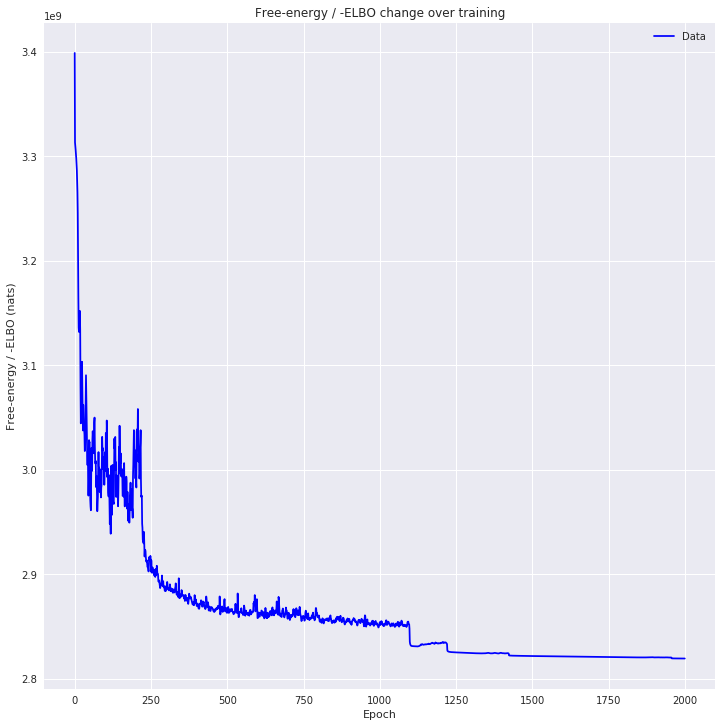

In [9]:
utils.plot_losses(losses)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


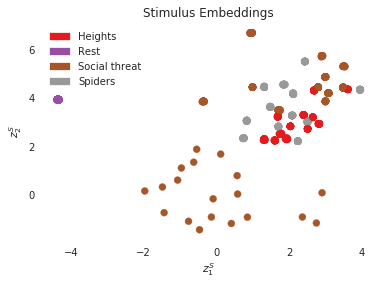

In [10]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None)

In [11]:
def subject_labeler(block):
    return 'Subject %d' % block.subject

def subject_run_labeler(block):
    return 'sub%drun%d' % (block.subject, block.run)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


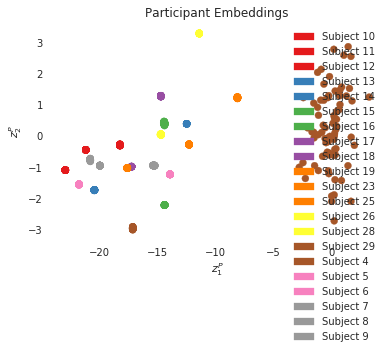

In [12]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


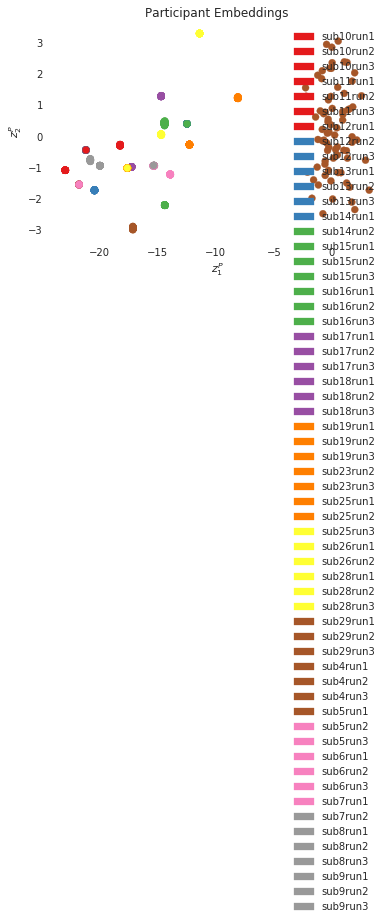

In [13]:
dtfa.scatter_subject_embedding(labeler=subject_run_labeler, figsize=None)

09/29/2018 19:35:23 Plotting factors for Participant 11, run 3


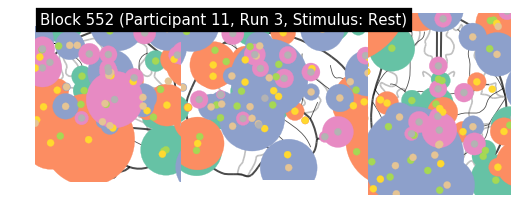

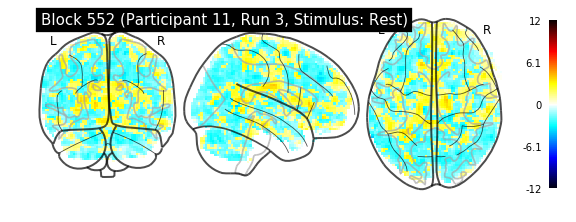

09/29/2018 19:35:27 Reconstruction Error (Frobenius Norm): 1.44399597e+03 out of 1.38676221e+03


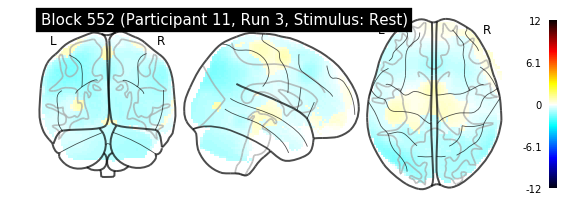

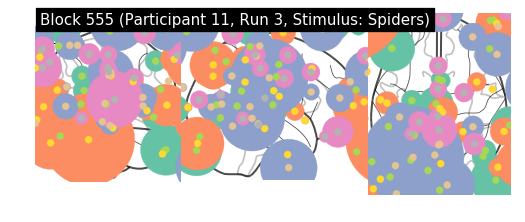

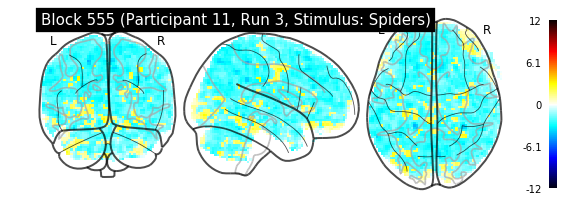

09/29/2018 19:35:31 Reconstruction Error (Frobenius Norm): 1.29151416e+03 out of 1.25745044e+03


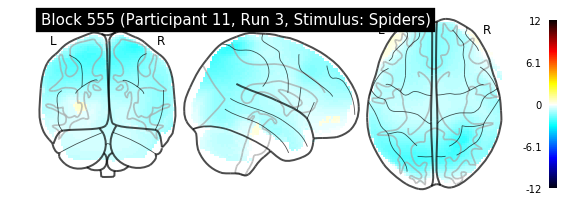

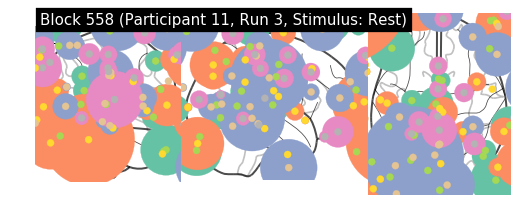

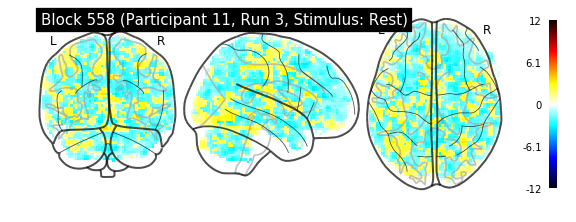

09/29/2018 19:35:34 Reconstruction Error (Frobenius Norm): 1.45739795e+03 out of 1.33457214e+03


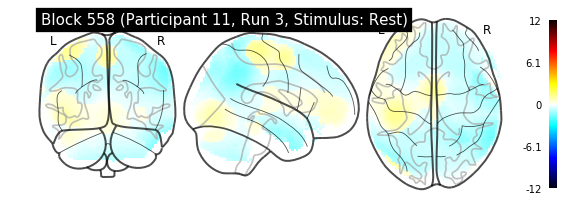

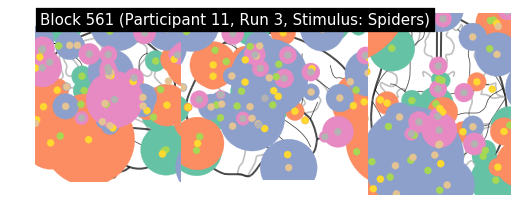

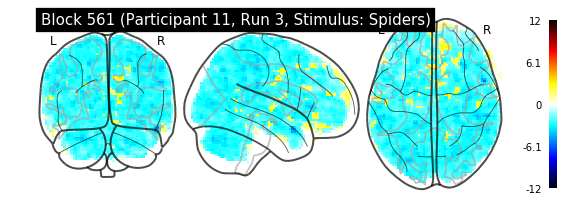

09/29/2018 19:35:38 Reconstruction Error (Frobenius Norm): 1.61314185e+03 out of 1.58387659e+03


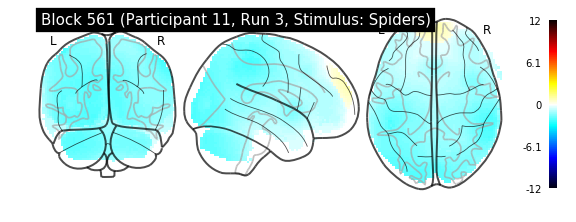

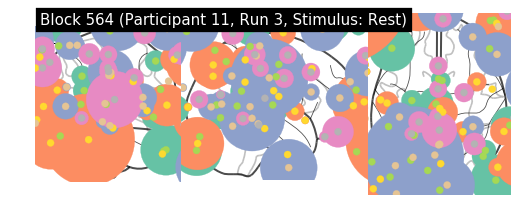

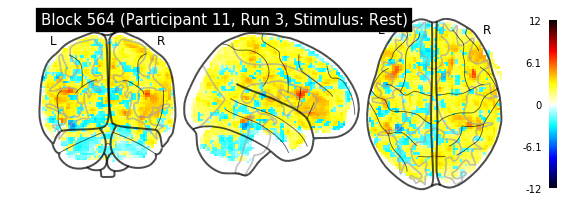

09/29/2018 19:35:41 Reconstruction Error (Frobenius Norm): 1.49009009e+03 out of 1.50243872e+03


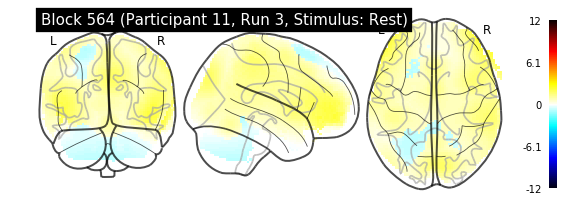

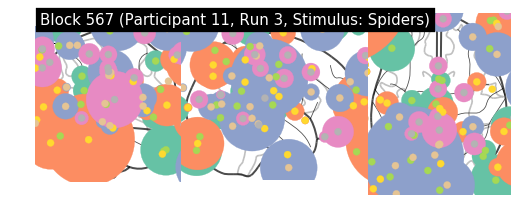

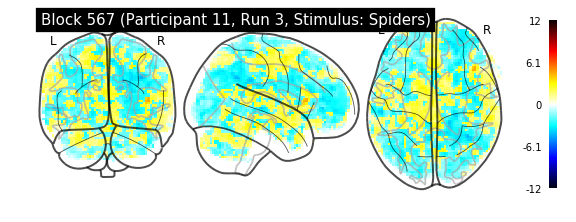

09/29/2018 19:35:45 Reconstruction Error (Frobenius Norm): 1.29147168e+03 out of 1.23265100e+03


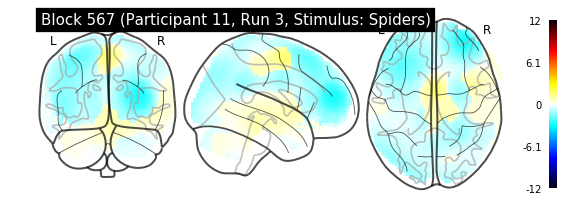

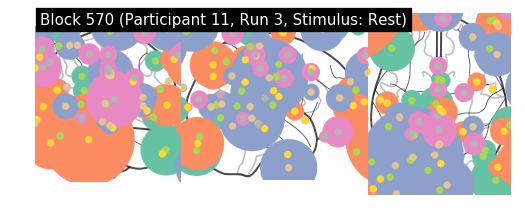

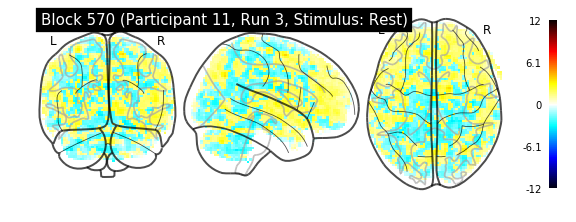

09/29/2018 19:35:48 Reconstruction Error (Frobenius Norm): 1.25391711e+03 out of 1.18337036e+03


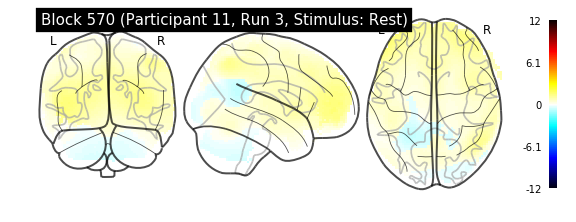

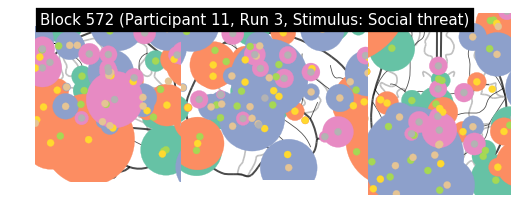

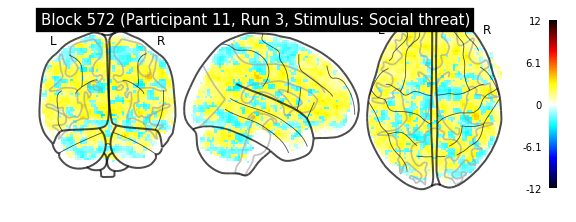

09/29/2018 19:35:52 Reconstruction Error (Frobenius Norm): 1.49190247e+03 out of 1.48869116e+03


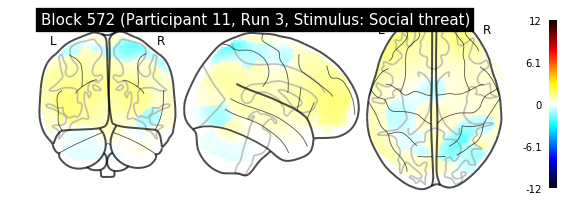

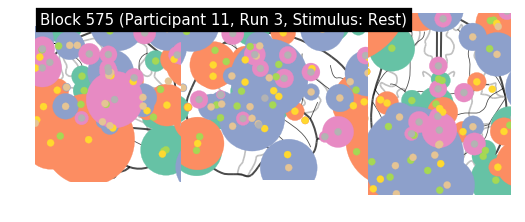

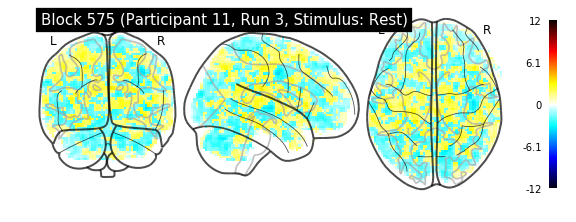

09/29/2018 19:35:56 Reconstruction Error (Frobenius Norm): 1.42807288e+03 out of 1.22215698e+03


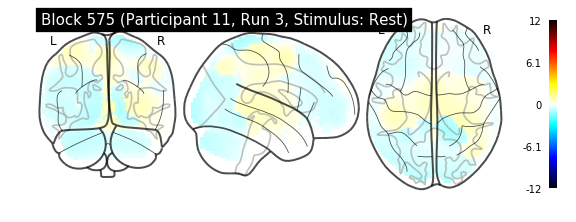

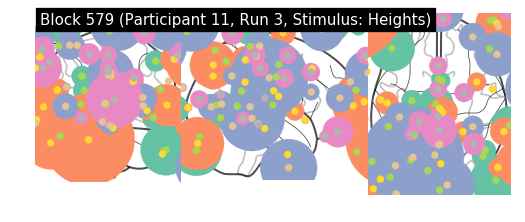

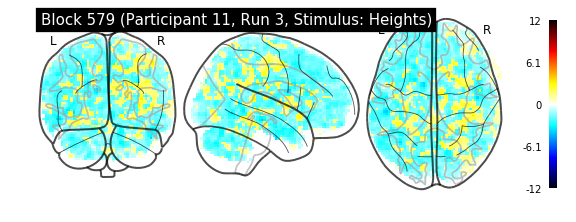

09/29/2018 19:35:59 Reconstruction Error (Frobenius Norm): 1.24327771e+03 out of 1.18423303e+03


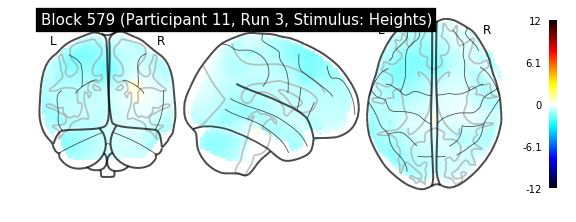

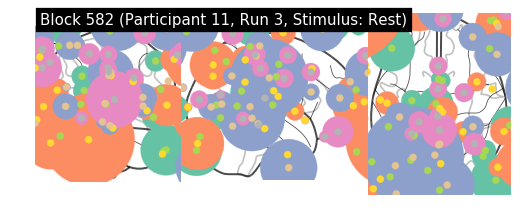

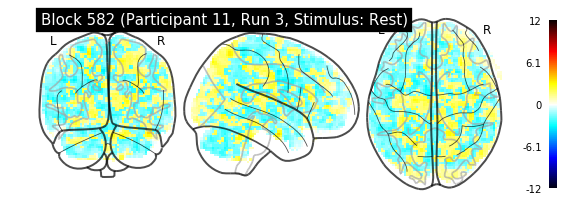

09/29/2018 19:36:03 Reconstruction Error (Frobenius Norm): 1.43865088e+03 out of 1.14719702e+03


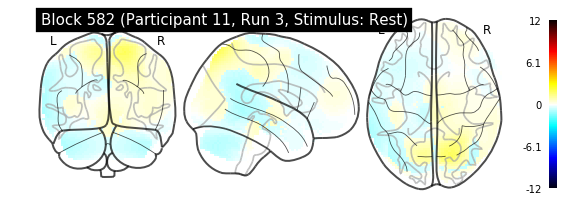

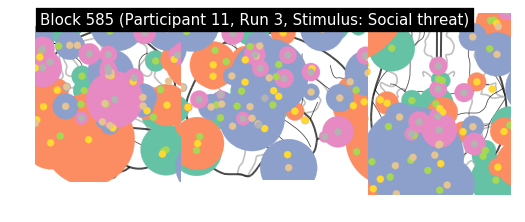

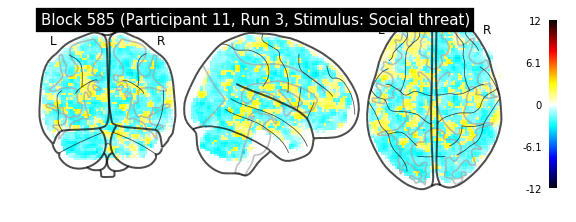

09/29/2018 19:36:06 Reconstruction Error (Frobenius Norm): 1.36926892e+03 out of 1.34052881e+03


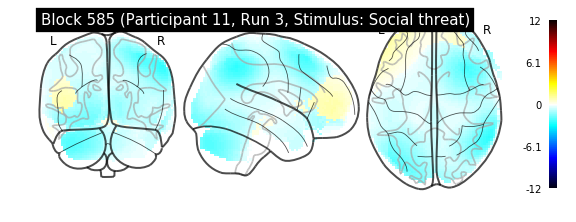

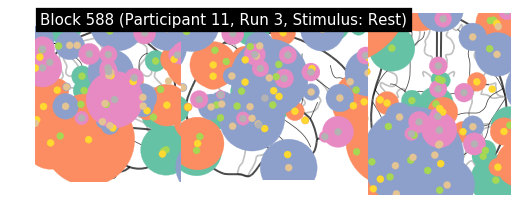

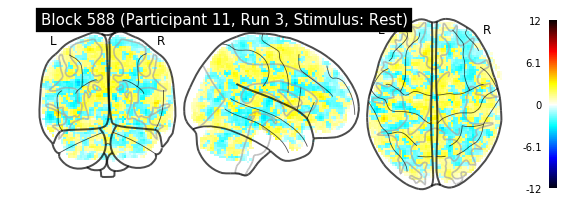

09/29/2018 19:36:10 Reconstruction Error (Frobenius Norm): 1.31240137e+03 out of 1.15535852e+03


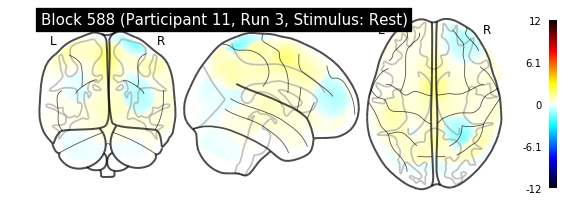

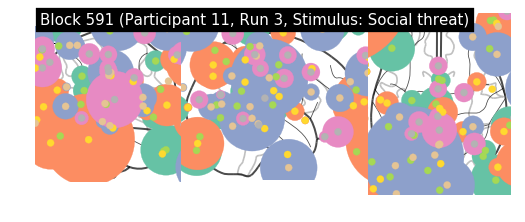

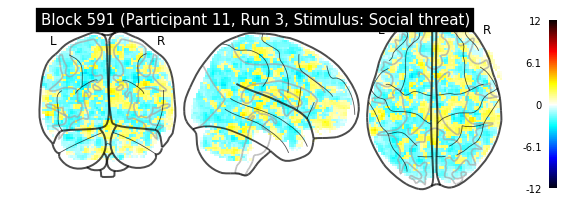

09/29/2018 19:36:13 Reconstruction Error (Frobenius Norm): 1.29435522e+03 out of 1.14132520e+03


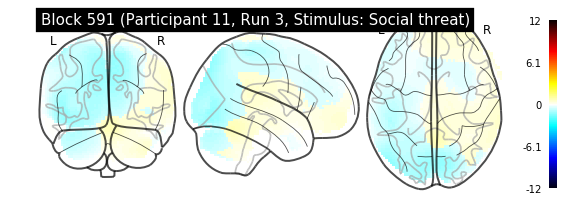

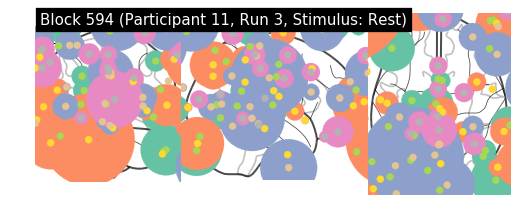

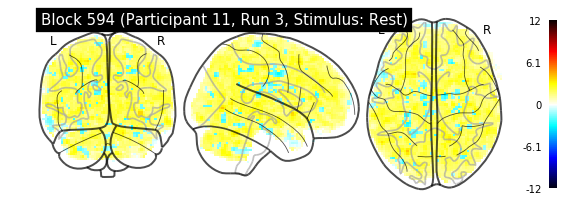

09/29/2018 19:36:17 Reconstruction Error (Frobenius Norm): 1.34478137e+03 out of 1.28563892e+03


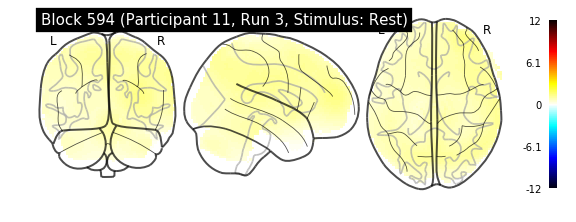

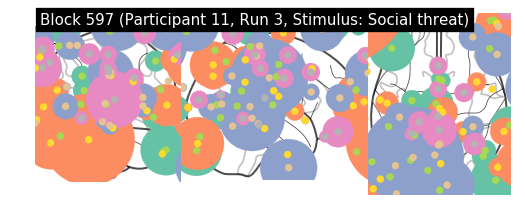

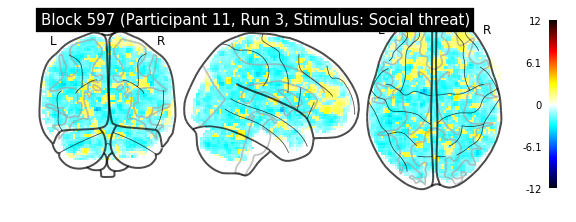

09/29/2018 19:36:20 Reconstruction Error (Frobenius Norm): 1.19608850e+03 out of 1.13991064e+03


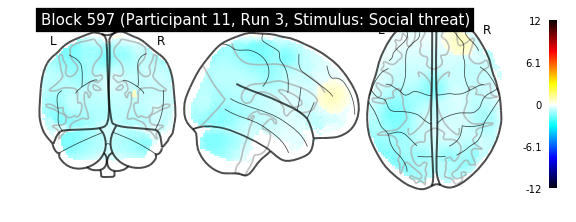

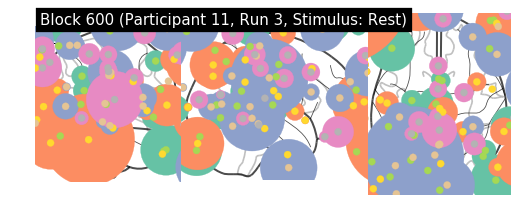

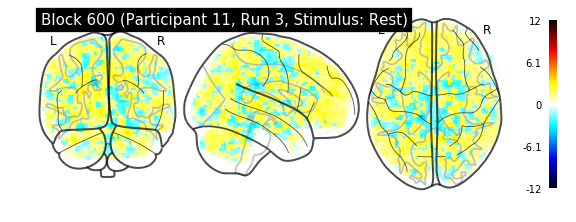

09/29/2018 19:36:24 Reconstruction Error (Frobenius Norm): 1.27387830e+03 out of 1.19813818e+03


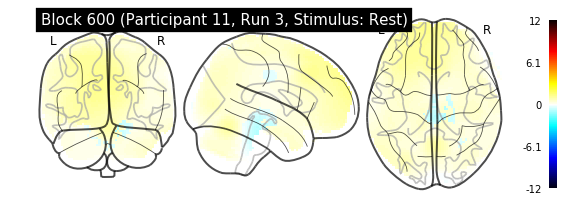

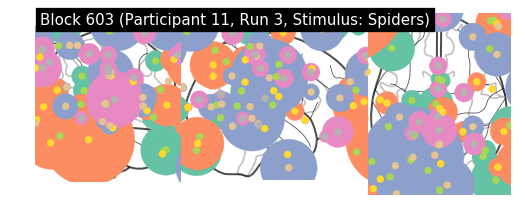

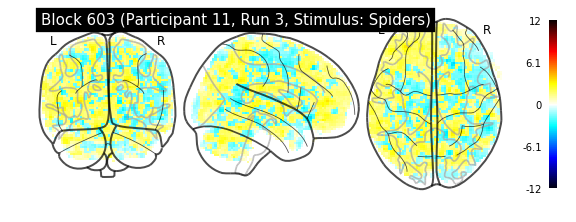

09/29/2018 19:36:27 Reconstruction Error (Frobenius Norm): 1.22462854e+03 out of 1.13954456e+03


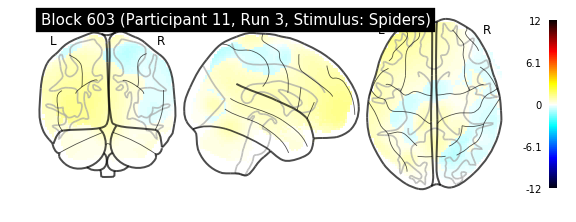

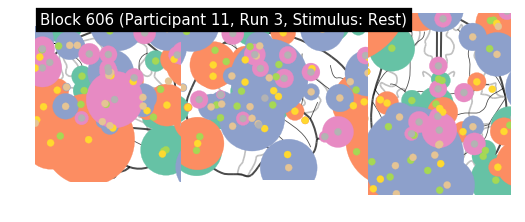

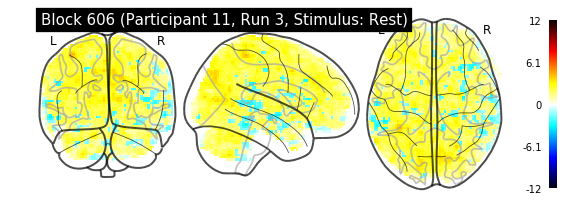

09/29/2018 19:36:31 Reconstruction Error (Frobenius Norm): 1.34752625e+03 out of 1.21164355e+03


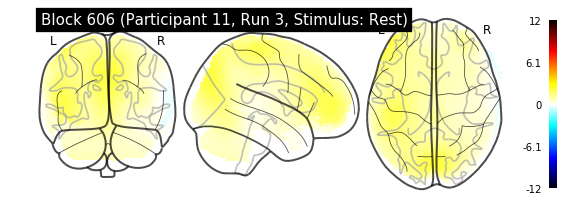

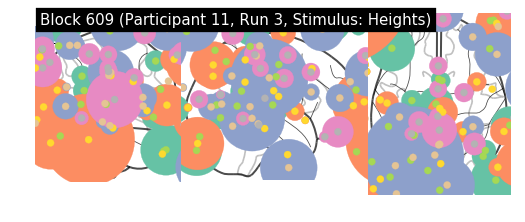

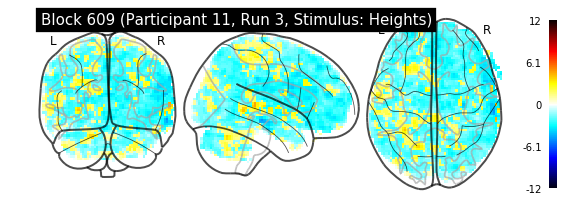

09/29/2018 19:36:34 Reconstruction Error (Frobenius Norm): 1.36951941e+03 out of 1.35510315e+03


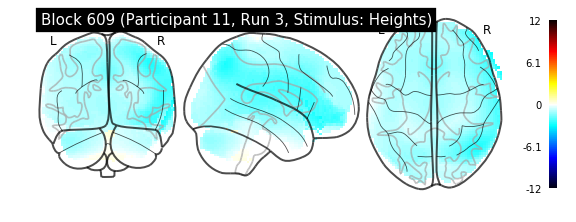

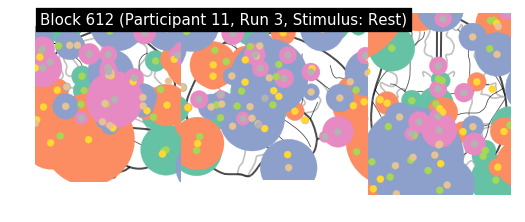

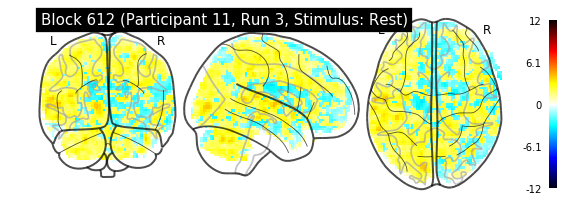

09/29/2018 19:36:38 Reconstruction Error (Frobenius Norm): 1.32603577e+03 out of 1.26923022e+03


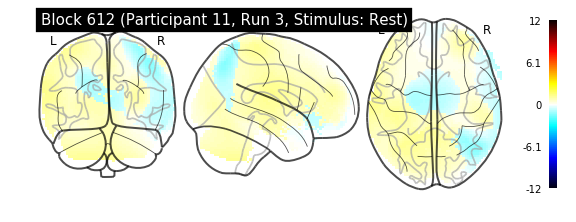

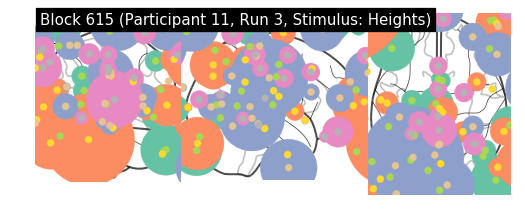

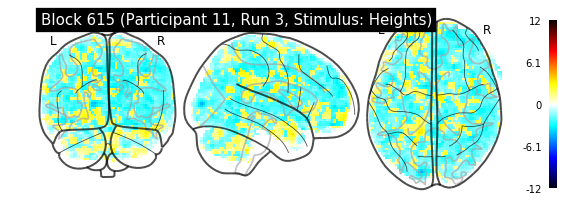

09/29/2018 19:36:41 Reconstruction Error (Frobenius Norm): 1.60054041e+03 out of 1.59393787e+03


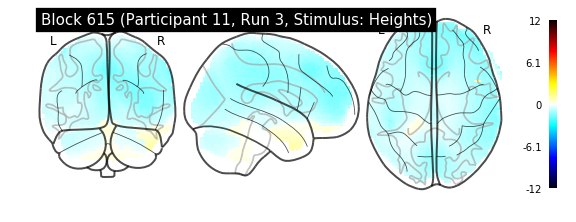

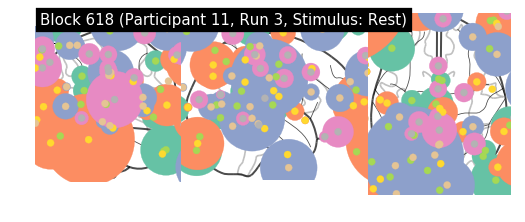

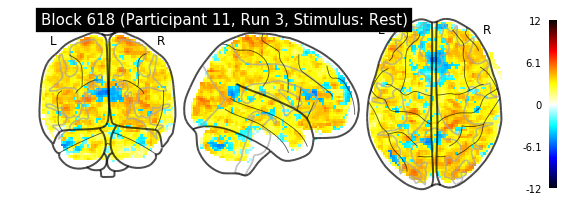

09/29/2018 19:36:45 Reconstruction Error (Frobenius Norm): 1.53495740e+03 out of 1.64909167e+03


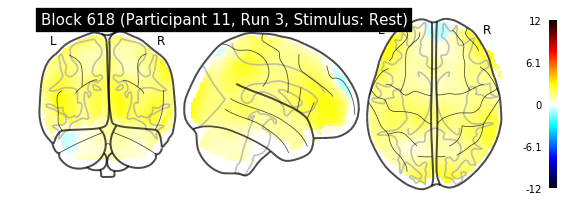

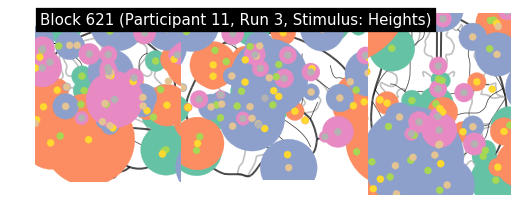

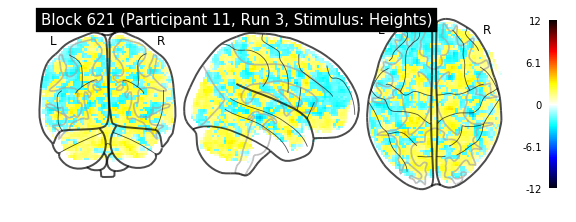

09/29/2018 19:36:48 Reconstruction Error (Frobenius Norm): 1.30517249e+03 out of 1.24387366e+03


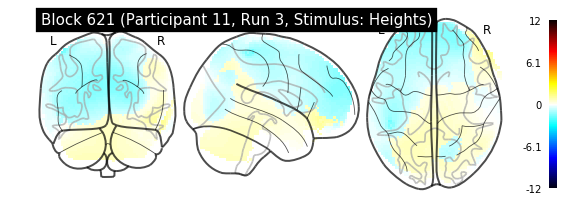

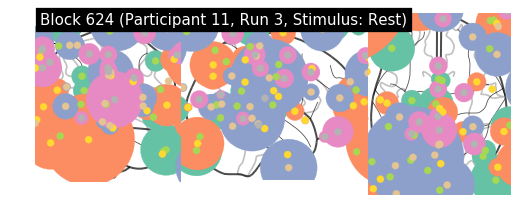

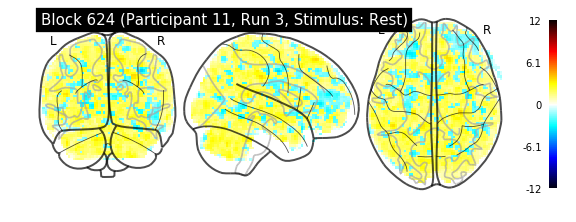

09/29/2018 19:36:52 Reconstruction Error (Frobenius Norm): 1.54509827e+03 out of 1.28433777e+03


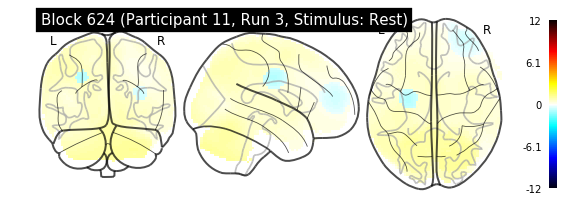

In [14]:
subject_runs = set([(block.subject, block.run) for block in dtfa._blocks])

for i in np.random.choice(range(len(subject_runs)), 1):
    subject, run = list(subject_runs)[i]
    logging.info('Plotting factors for Participant %d, run %d' % (subject, run))
    blocks = [block for block in dtfa._blocks if block.subject == subject and block.run == run]
    blocks.sort(key=lambda b: b.start_time)
    for block in blocks:
        index = dtfa._blocks.index(block)
        dtfa.plot_factor_centers(index, labeler=task_labeler)
        dtfa.plot_original_brain(index, labeler=task_labeler)
        dtfa.plot_reconstruction(index, labeler=task_labeler)


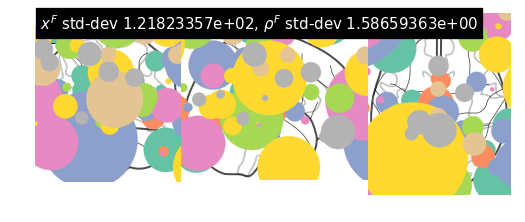

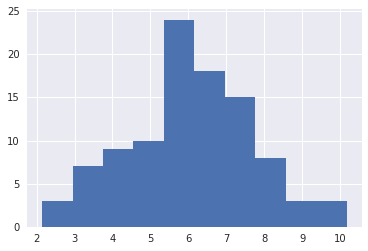

(<nilearn.plotting.displays.OrthoProjector at 0x7f6eb6e85358>,
 tensor([[ -52.3210,  -39.7257,   66.5939],
         [  86.9306,   -9.7535,   47.9076],
         [ -81.5252,  -53.5234,    4.3613],
         [ -48.7437,   42.2253,   94.4387],
         [   1.8867, -106.8453,   82.7063],
         [  55.1813,   71.6523,   21.0260],
         [  60.6239,  -96.3990,  -42.4834],
         [  75.2971,  -38.5991,   87.8253],
         [ -28.9405,  -75.0701,    5.3670],
         [  49.6302,  -65.0602,   51.0199],
         [ -25.7156,  -49.2348,   20.0015],
         [ -27.4888,  -12.4283,   35.4626],
         [  53.9017,   42.0069,  100.5250],
         [  -2.2814,  -16.2208,    5.3163],
         [  58.2833,   72.1926,  -44.0401],
         [ -69.6708,  -77.2463,   62.7339],
         [   4.4018,    8.3896,  -88.2295],
         [   0.5789,   10.3373,  129.5066],
         [ -59.7195,   73.9602,   86.9317],
         [ -11.2120,  -85.9889, -100.4166],
         [ 133.7892, -118.9504,    0.8829],
         [ -8

In [15]:
dtfa.visualize_factor_embedding()